# Pandas Practice A

# 🎯 Objectives

By completing this notebook you will practice and strengthen your skills in:
- Data loading and exploration
- Grouping and aggregation
- Filtering and sorting
- Visualization with Pandas
- Data cleaning and feature engineering
- Merging and joining datasets
- Pivot tables and reshaping
- Datetime and string operations
- Working with MultiIndex
- Apply & lambda functions
- Cumulative operations

These exercises are designed to prepare you for real-world **Data Analysis** and to build a strong foundation for **Data Science** tasks.

## Section 1: Basic Exploration
1. Load `sales.csv`. Show the first 10 rows and summary statistics (`.describe()`).
2. How many unique products and regions are in the dataset?

### 🔥 Challenge Task (Section 1: Exploration)
Combine multiple exploration methods:
- Count unique regions and products
- Find the average revenue
- Identify the date with the maximum total revenue

*(Notebook: Practice A, Section 1)*

In [10]:
import pandas as pd

df = pd.read_csv('csv/sales.csv')
print(df.head(10))
print(df.describe())
print(f"Count of unique Products {df['product'].nunique()}")
print(f"Count of unique Regions {df['region'].nunique()}")

print(f"Average Revenue {df['revenue'].mean():.2f}")
print(df.loc[[df['revenue'].idxmax()], ['date', 'revenue']])

         date   region    product  quantity  price  revenue
0  2023-02-08     East  Product D         3  64.33    193.0
1  2023-02-21     East  Product B        11  26.36    290.0
2  2023-01-29     West  Product A        11  18.55    204.0
3  2023-01-15    South  Product D        18  20.06    361.0
4  2023-02-12    South  Product E        15  13.60    204.0
5  2023-02-12    South  Product E        15  13.60    204.0
6  2023-01-21    North  Product A         9  11.33    102.0
7  2023-02-08  Central  Product D        10  16.90    169.0
8  2023-02-27     West  Product C        12  36.92    443.0
9  2023-01-19     West  Product D        17   4.12     70.0
         quantity       price     revenue
count  200.000000  199.000000  199.000000
mean    10.025000   42.821106  222.075377
std      5.671437   66.773612  143.406603
min      1.000000   -5.000000  -50.000000
25%      5.000000   10.120000   97.000000
50%     10.000000   20.000000  223.000000
75%     15.000000   39.830000  335.000000
max 

## Section 2: Groupby & Aggregation
3. Calculate total revenue per product.
4. Find the average revenue per sale in each region.
5. For each region, find the product with the **minimum revenue**.

### 🔥 Challenge Task (Section 2: Groupby)
Perform a multi-level groupby (`region`, `product`) and:
- Find the total revenue
- Identify the top product in each region

*(Notebook: Practice A, Section 2)*

In [11]:
print(df.head(10))

total_rev_product = (
    df
    .groupby('product')['revenue']
    .sum()
    .reset_index(name='total_revenue')
)
print(total_rev_product)
avg_rev_region = (
    df
    .groupby('region')['revenue']
    .mean()
    .round(2)
    .reset_index(name='average_revenue')
)
print(avg_rev_region)
min_rev_region = (
    df
    .groupby(['region', 'product'])['revenue']
    .min()
    .reset_index(name='min_revenue')
)
print(min_rev_region)
total_rev_region = (
    df
    .groupby(['region', 'product'])['revenue']
    .sum()
    .reset_index(name='total_revenue')
)
print(total_rev_region)
top_products = (
    total_rev_region
    .loc[total_rev_region.groupby('region')['total_revenue'].idxmax()]
    .reset_index(drop=True)
)
print(top_products)

         date   region    product  quantity  price  revenue
0  2023-02-08     East  Product D         3  64.33    193.0
1  2023-02-21     East  Product B        11  26.36    290.0
2  2023-01-29     West  Product A        11  18.55    204.0
3  2023-01-15    South  Product D        18  20.06    361.0
4  2023-02-12    South  Product E        15  13.60    204.0
5  2023-02-12    South  Product E        15  13.60    204.0
6  2023-01-21    North  Product A         9  11.33    102.0
7  2023-02-08  Central  Product D        10  16.90    169.0
8  2023-02-27     West  Product C        12  36.92    443.0
9  2023-01-19     West  Product D        17   4.12     70.0
     product  total_revenue
0  Product A         9250.0
1  Product B         8749.0
2  Product C         6487.0
3  Product D         9128.0
4  Product E        10579.0
    region  average_revenue
0  Central           256.65
1     East           234.38
2    North           199.49
3    South           205.97
4     West           228.64
    

## Section 3: Filtering & Sorting
6. Select all transactions where `quantity > 5`.
7. Sort the dataset by `revenue` in descending order and show the top 15 rows.
8. Find the **top 2 dates with the highest total revenue**.

### 🔥 Challenge Task (Section 3: Filtering & Sorting)
Filter products with revenue greater than the overall average and:
- Sort by quantity
- Show the top-N results

*(Notebook: Practice A, Section 3)*

In [12]:
print(df.head(10))
filter_5 = df[df['quantity'] > 5]
biggest15_revenue = (
    df
    .sort_values(by='revenue', ascending=False)
    .head(15)
)
print(biggest15_revenue)
top2_dates = (
    df
    .groupby('date')['revenue']
    .sum()
    .nlargest(2)
    .reset_index(name='total_revenue')
)
print(top2_dates)
n = 5
filtered = (
    df
    .loc[df['revenue'] > df['revenue'].mean()]
    .sort_values(by='quantity', ascending=False)
    .head(n)
)
print(filtered)

         date   region    product  quantity  price  revenue
0  2023-02-08     East  Product D         3  64.33    193.0
1  2023-02-21     East  Product B        11  26.36    290.0
2  2023-01-29     West  Product A        11  18.55    204.0
3  2023-01-15    South  Product D        18  20.06    361.0
4  2023-02-12    South  Product E        15  13.60    204.0
5  2023-02-12    South  Product E        15  13.60    204.0
6  2023-01-21    North  Product A         9  11.33    102.0
7  2023-02-08  Central  Product D        10  16.90    169.0
8  2023-02-27     West  Product C        12  36.92    443.0
9  2023-01-19     West  Product D        17   4.12     70.0
           date   region    product  quantity   price  revenue
174  2023-01-27  Central  Product E        19   26.05    495.0
89   2023-01-18     West  Product B        13   38.00    494.0
62   2023-02-27     East  Product E        19   25.42    483.0
97   2023-02-17    North  Product A         5   96.60    483.0
87   2023-02-23    North 

## Section 4: Visualization
9. Plot a **line chart** of total revenue over time.
10. Plot a **bar chart** of average `quantity` per product.
11. Plot a **histogram** of `revenue`.

### 🔥 Challenge Task (Section 4: Visualization)
Create multiple plots on one figure:
- Line chart of revenue over time
- Bar chart of revenue by region
- Histogram of quantity

*(Notebook: Practice A, Section 4)*

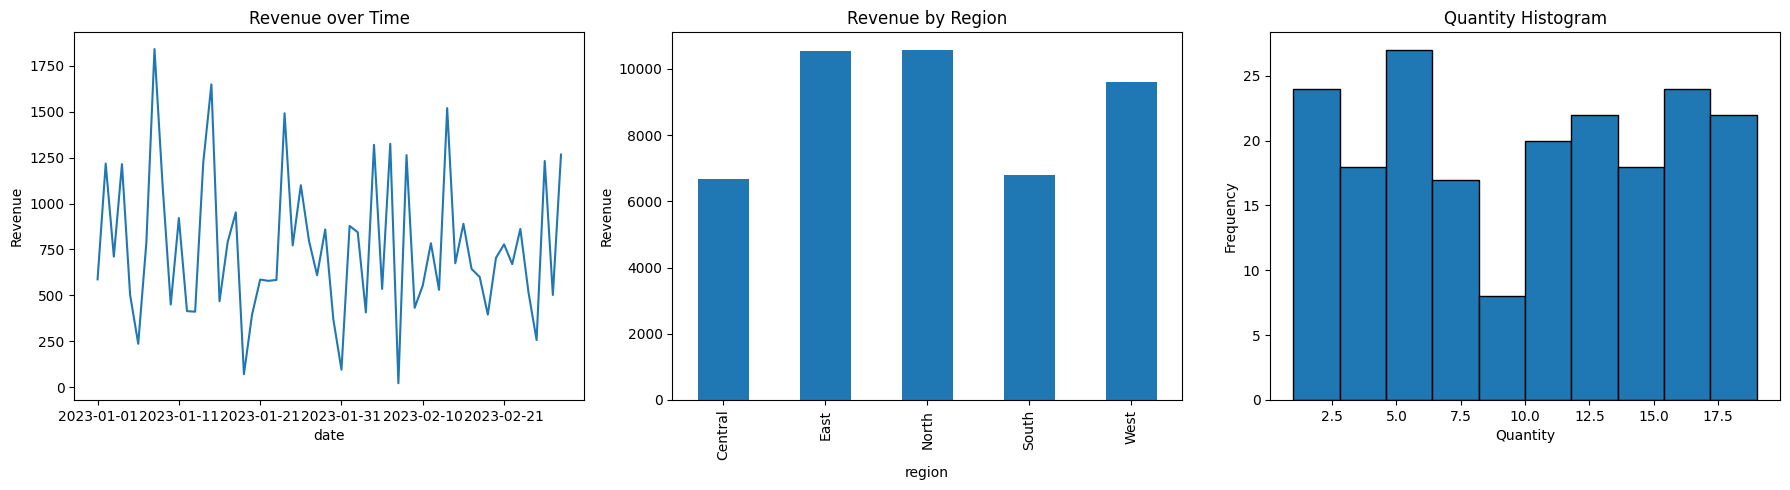

In [13]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Line chart revenue over time
df.groupby('date')['revenue'].sum().plot(
    kind='line', ax=axes[0], title='Revenue over Time'
)
axes[0].set_ylabel("Revenue")

# 2. Bar chart revenue by region
df.groupby('region')['revenue'].sum().plot(
    kind='bar', ax=axes[1], title='Revenue by Region'
)
axes[1].set_ylabel("Revenue")

# 3. Histogram of quantity
df['quantity'].plot(
    kind='hist', bins=10, ax=axes[2], title='Quantity Histogram', edgecolor='black'
)
axes[2].set_xlabel("Quantity")

plt.tight_layout()
plt.show()


## Section 5: Portfolio Challenge
12. Write a function `region_report(df)` that returns a dictionary with:
- total revenue in the region,
- the most profitable product in that region,
- average revenue per transaction.

### 🔥 Challenge Task (Section 5: Portfolio Challenge)
Extend your function to also return:
- Cumulative revenue
- Number of unique transaction dates

*(Notebook: Practice A, Section 5)*

In [14]:
def region_report(filename: str)->dict:
    df = pd.read_csv(filename)
    total_region_revenue = (
        df
        .groupby('region')['revenue']
        .sum()
        .reset_index(name='total_revenue')
    )
    region_product_sales = (
        df
        .groupby(['region', 'product'])['revenue']
        .sum()
        .reset_index()
    )
    region_bestseller = (
        region_product_sales
        .loc[region_product_sales.groupby('region')['revenue'].idxmax()]
        .reset_index(drop=True)
    )
    avg_region_revenue = (
        df
        .groupby('region')['revenue']
        .mean()
        .round(2)
        .reset_index(name='avg_revenue')
    )
    cumulative_revenue = (
        df
        .groupby('date')['revenue']
        .sum()
        .sort_index()
        .cumsum()
        .reset_index(name='cumulative_revenue')
    )
    num_unique_dates = df['date'].nunique()
    return {
        'Total Revenue by Region': total_region_revenue,
        'Most profitable Product in Region': region_bestseller,
        'Average Region Revenue': avg_region_revenue,
        'Cumulative Revenue': cumulative_revenue,
        'Unique dates': num_unique_dates
    }
report = region_report('csv/sales.csv')
for k, v in report.items():
    print(k)
    print(v)

Total Revenue by Region
    region  total_revenue
0  Central         6673.0
1     East        10547.0
2    North        10573.0
3    South         6797.0
4     West         9603.0
Most profitable Product in Region
    region    product  revenue
0  Central  Product A   2040.0
1     East  Product E   3609.0
2    North  Product B   2788.0
3    South  Product E   2128.0
4     West  Product B   2768.0
Average Region Revenue
    region  avg_revenue
0  Central       256.65
1     East       234.38
2    North       199.49
3    South       205.97
4     West       228.64
Cumulative Revenue
          date  cumulative_revenue
0   2023-01-01               587.0
1   2023-01-02              1805.0
2   2023-01-03              2516.0
3   2023-01-04              3731.0
4   2023-01-05              4234.0
5   2023-01-06              4470.0
6   2023-01-07              5257.0
7   2023-01-08              7099.0
8   2023-01-09              8197.0
9   2023-01-10              8647.0
10  2023-01-11              9

## Section 6: Advanced Pandas

### Data Cleaning
1. Check if there are any missing values in `sales.csv`. Fill them with zeros.
2. Remove duplicate transactions if they exist.
3. Replace all negative values in the `revenue` column with 0.

### Feature Engineering
4. Create a new column `price_per_unit` = `revenue / quantity`.
5. From the `date` column, extract two new columns: `year` and `month`.
6. Use `pd.cut` to categorize `revenue` into three groups: 'low', 'medium', 'high'.

### Merging & Joining
7. Create two DataFrames:
   - `products` (product_id, product_name),
   - `sales` (product_id, revenue, quantity).
   Merge them on `product_id`.
8. Use `concat` to combine sales data from two months (`sales_jan.csv` and `sales_feb.csv`).

### Pivot Tables & Reshaping
9. Build a `pivot_table` where rows = regions, columns = products, values = total revenue.
10. Use `melt` to convert data from wide to long format (e.g., from the pivot table).
11. Perform `groupby(['region', 'product'])['revenue'].sum().unstack()` and compare it with the pivot_table.

### 🔥 Challenge Task (Section 6: Advanced Pandas)
Build a full data cleaning pipeline:
- Remove duplicates
- Fill missing values
- Replace negatives
- Create a new feature
- Merge/concat extra data
- Build a pivot table summary

*(Notebook: Practice A, Section 6)*

In [15]:
import numpy as np
df = pd.read_csv('csv/sales.csv')

df = df.fillna(0)
df = df.drop_duplicates()

df['revenue'] = df['revenue'].clip(lower=0)
df['price_per_unit'] = (
    df['revenue']
    .div(df['quantity'])
    .replace([np.inf, -np.inf], 0)
    .fillna(0)
    .round(2)
)

if not pd.api.types.is_datetime64_any_dtype(df['date']):
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

df['revenue_group'] = pd.cut(
    df['revenue'], 
    bins=3, 
    labels = ['low', 'medium', 'high']
)

products = pd.DataFrame({
    "product_id": [1, 2, 3],
    "product_name": ["Product A", "Product B", "Product C"]
})

sales = pd.DataFrame({
    "product_id": [1, 2, 1],
    "revenue": [100, 200, 150],
    "quantity": [2, 5, 3]
})

products.merge(sales, on='product_id', how='left')
jan_sales = pd.read_csv('csv/sales_jan.csv')
feb_sales = pd.read_csv('csv/sales_feb.csv')
pd.concat([jan_sales, feb_sales], ignore_index=True)

piv = pd.pivot_table(
    df,
    values = 'revenue',
    index = 'region',
    columns = 'product',
    aggfunc = 'sum',
    fill_value = 0
)
melted = pd.melt(
    piv.reset_index(),
    id_vars = 'region',
    value_vars = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E'],
    var_name = 'product',
    value_name = 'revenue'
)
melted

,region,product,revenue
0,Central,Product A,2040.0
1,East,Product A,1325.0
2,North,Product A,2525.0
3,South,Product A,1396.0
4,West,Product A,1964.0
5,Central,Product B,450.0
6,East,Product B,2137.0
7,North,Product B,2788.0
8,South,Product B,606.0
9,West,Product B,2768.0


## Section 7: Extra Pandas Practice

### Datetime Operations
1. From the `date` column, extract the day of the week for each transaction.
2. Group total revenue by **month** and plot the trend.
3. Resample daily revenue into monthly totals.

### String Operations
4. Select all rows where `product` name contains the letter 'A'.
5. Create a new column with `product` names in uppercase.
6. Split the `region` column (e.g., 'North-East') into two separate columns.

### MultiIndex
7. Perform `groupby(['region', 'product'])['revenue'].sum()` and explore the MultiIndex.
8. Reset the index and compare with the MultiIndex version.
9. Access revenue for a specific region-product pair using `.loc` on MultiIndex.

### Apply + Lambda
10. Create a new column `discounted_revenue` = `revenue` * 0.9 using `.apply`.
11. Use `.apply` with a lambda to classify transactions as 'high' or 'low' revenue.
12. For each product group, apply a custom function that returns the revenue range (max-min).

### Cumulative Operations
13. Compute the cumulative revenue over time.
14. Compute the cumulative maximum of `quantity`.
15. For each region, calculate the cumulative sum of revenue.

### 🔥 Challenge Task (Section 7: Extra Pandas Practice)
Combine datetime, string, and cumulative operations:
- Select only products containing 'A'
- Group by month
- Compute cumulative revenue trend for those products

*(Notebook: Practice A, Section 7)*

2      Product A
6      Product A
13     Product A
18     Product A
24     Product A
40     Product A
48     Product A
51     Product A
54     Product A
56     Product A
59     Product A
68     Product A
72     Product A
80     Product A
92     Product A
97     Product A
105    Product A
106    Product A
113    Product A
114    Product A
126    Product A
134    Product A
143    Product A
146    Product A
150    Product A
152    Product A
156    Product A
159    Product A
161    Product A
163    Product A
164    Product A
165    Product A
167    Product A
171    Product A
175    Product A
178    Product A
187    Product A
193    Product A
Name: product, dtype: object
      date  cumulative_revenue
0  2023-01              4573.0
1  2023-02              8458.0
2  2023-03              9250.0


<Axes: title={'center': 'Cumulative Revenue Trend (Products with A)'}, xlabel='Month', ylabel='Revenue'>

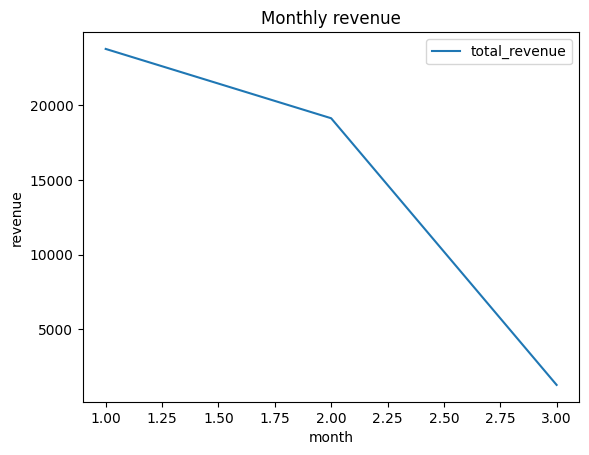

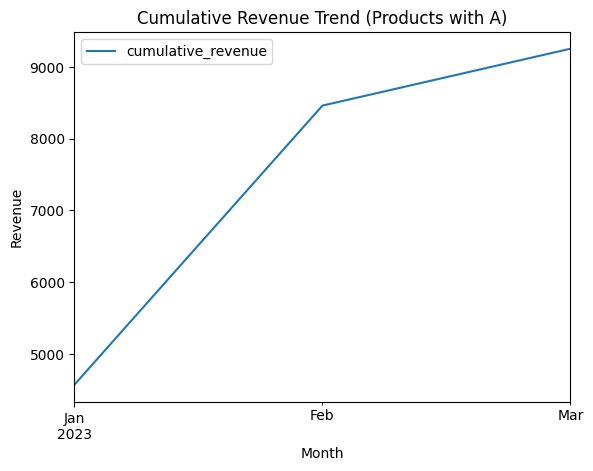

In [16]:
import matplotlib.pyplot as plt
df = pd.read_csv('csv/sales.csv')
if not pd.api.types.is_datetime64_any_dtype(df['date']):
    df['date'] = pd.to_datetime(df['date'])
df['date'].dt.dayofweek
monthly_revenue = (
    df
    .groupby(df['date'].dt.month)['revenue']
    .sum()
    .reset_index(name='total_revenue')
)
monthly_revenue.plot(
    kind='line', x='date', y='total_revenue', title = 'Monthly revenue', xlabel='month', ylabel='revenue'
)
monthly_totals = df.resample('ME', on='date')['revenue'].sum()
monthly_totals

print(df.loc[df['product'].str.contains('A'), 'product'])
df['product_upper'] = df['product'].str.upper()
split_cols = (
    df['region']
    .str
    .split('-', n=1, expand=True)
    .fillna('')
)
m_index = (
    df
    .groupby(['region', 'product'])['revenue']
    .sum()
)
m_index.reset_index()
m_index.loc[('Central', 'Product A')]
df['discounted_revenue'] = df.apply(lambda x: x['revenue'] *  0.9, axis=1)
avg = df['revenue'].mean()
df['transaction_class'] = df.apply(
    lambda x:
    'high' if avg < x['revenue'] else 'low' ,
    axis=1
)
product_group = (
    df
    .groupby('product')['revenue']
    .apply(lambda x: f"{x.min()}-{x.max()}")
)
cumul_over_time = (
    df
    .groupby('date')['revenue']
    .sum()
    .cumsum()
)
cumul_quantity = df['quantity'].cumsum()
cumul_quantity.iloc[-1]
region_cumsum = (
    df
    .groupby('region')['revenue']
    .sum()
    .cumsum()
)
challenge = (
    df.loc[df['product'].str.contains('A')]
      .groupby(df['date'].dt.to_period('M'))['revenue']
      .sum()
      .cumsum()
      .reset_index(name='cumulative_revenue')
)

print(challenge)
challenge.plot(
    kind='line', x='date', y='cumulative_revenue',
    title='Cumulative Revenue Trend (Products with A)',
    xlabel='Month', ylabel='Revenue'
)
